# Resonant Filters

So far, the filter designs we’ve concentrated on have employed either capacitors or inductors, but never *both* at the same time. We should know by now that combinations of L and C will tend to resonate, and this property can be exploited in designing band-pass and band-stop filter circuits.

Series LC circuits give minimum impedance at resonance, while parallel LC (“tank”) circuits give maximum impedance at their resonant frequency. Knowing this, we have two basic strategies for designing either band-pass or band-stop filters.

For band-pass filters, the two basic resonant strategies are this: series LC to pass a signal, or parallel LC to short a signal. The two schemes will be contrasted and simulated here:

Recall that the resonant frequency ($f_\mathrm{res}$) is defined as the fequency at which:  

$$ X_L = X_C$$

$$ 2\pi f_\mathrm{res} L = \frac{1}{2\pi f_\mathrm{res} C}$$

$$ f_\mathrm{res}^2 = \frac{1}{4\pi^2L C}$$

Finally, 
$$ f_\mathrm{res} = \frac{1}{2\pi\sqrt{LC}}$$

In [1]:
import CircuitTheory.filters as filters
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_res(L: float, C: float):
    """ The resonant frequency in Hertz. """
    return 1/(2*np.pi*np.sqrt(L*C))

# Series LC Filter

This kind of filter is an RLC series circuit of the form:  $\mathrm{E}--\mathrm{L}_1--\mathrm{C}_1--\mathrm{load}$.

This kind of filter has minimum impedance at resonance meaning the voltage dropped across the load is at it's highest at this frequency.

### Generalized Equation(s)

Via KVL and Ohm's Law,
$$ E = ZI$$

and,
$$ Z = R_\mathrm{load} + j \cdot (X_{\mathrm{L}1} - X_{\mathrm{C}1})$$

At resonance the imaginary part of $Z$ is equal to zero;  But, at any other frequency, the imaginary part is non-zero, hence the minimum impedance occuring at resonance.

$$ I = \frac{E}{Z}$$

$$ |I| = \frac{|E|}{|Z|} = \frac{|E|}{\sqrt{R_\mathrm{load}^2 + \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2}}$$

The output voltage signal is given by:  

$$ E_\mathrm{load} = R_\mathrm{load} I$$

And, finally, the amplitude of said signal is given by:

$$ |E_\mathrm{load}| = R_\mathrm{load}|I|$$

In [3]:
Resistor = filters.Resistor
Capacitor = filters.Capacitor
Inductor = filters.Inductor

## Specific Example

![lc-series-example](https://www.allaboutcircuits.com/uploads/articles/series-resonant-lc-band-pass-filter.png)

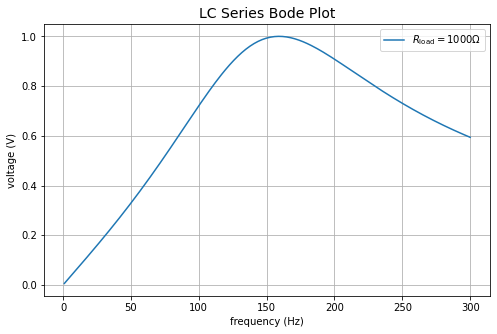

In [10]:
L1 = Inductor(1)
C1 = Capacitor(1e-6)
load = Resistor(1000)

flt = filters.SeriesLCResonantFilter(complex(1, 0), L1, C1, load)

# Create frequency domain.
f = np.linspace(1, 300, num=200)

mag_E_load = np.array(list(map(flt.load_voltage_mag, f)))

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('LC Series Bode Plot', size=14)
ax.set_xlabel('frequency (Hz)', size=10)
ax.set_ylabel('voltage (V)', size=10)
ax.grid()

L = ax.plot(f, mag_E_load, label=r'$R_\mathrm{load} = 1000\Omega$')
ax.legend()

The resonant frequency of this filter is:

In [9]:
print(f'f_res = {f_res(L = L1.inductance, C = C1.capacitance):.2f}Hz.')

f_res = 159.15Hz.


### Different Load Resistance

Suppose we were to change the load's resistance, but keep everything else the same.  The resonant frequency does not depend on the resistance, so that will remain the same.  The only thing that may change is the shape of the bode plot (plot of the amplitude of the output voltage signal).

**Decreasing the load resistance** to $500\Omega$ yields the following bode plot.

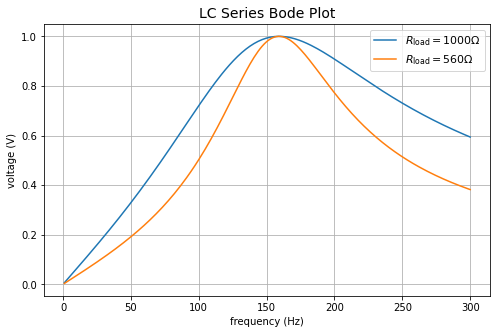

In [11]:
del load
load = Resistor(560)

flt = filters.SeriesLCResonantFilter(complex(1, 0), L1, C1, load)



fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('LC Series Bode Plot', size=14)
ax.set_xlabel('frequency (Hz)', size=10)
ax.set_ylabel('voltage (V)', size=10)
ax.grid()

L = ax.plot(f, mag_E_load, label=r'$R_\mathrm{load} = 1000\Omega$')
mag_E_load = np.array(list(map(flt.load_voltage_mag, f)))
L.extend(ax.plot(f, mag_E_load, label=r'$R_\mathrm{load} = 560\Omega$'))

ax.legend(fontsize=11)


Decreasing the load made the curve steeper and thus the frequency band narrower.

To find out why this is and determine if this relationship holds across the various resistances that a load may have, first let's differentiate the amplitude of the output signal with respect to the frequency.

$$ \frac{\mathrm{d}|E_\mathrm{load}|}{\mathrm{d}f} = R_\mathrm{load} \frac{\mathrm{d}|I|}{\mathrm{d}f}$$

\begin{align*}
    \frac{\mathrm{d}|I|}{\mathrm{d}f} &= -\frac{|E|}{|Z|^3} \cdot 2\big(X_{\mathrm{L}1} - X_{\mathrm{C}1}\big) \cdot \left(2\pi L_1 + \frac{1}{2\pi f^2 C_1} \right) \\ \\
     &= -\frac{|E|}{|Z|^3} \cdot 2\left(2\pi f L_1 - \frac{1}{2\pi f C_1}\right) \cdot \left(2\pi L_1 + \frac{1}{2\pi f^2 C_1} \right) 
\end{align*}

Now suppose we have two series LC filters that only differ by their load resistances, $R_1$ and $R_2$, and that:  

$$ R_1 < R_2$$

It should then follow that:  

$$ |E_1|'(f) > |E_2|'(f) \quad \text{where }f \ne f_\mathrm{res}$$

and,
$$ |E_1|'(f_\mathrm{res}) = |E_2|'(f_\mathrm{res}) = 0$$

Dividing through by the last two factors on the right of the identity $|I|'(f)$ and $-|E|$ gives:

$$ \frac{R_1}{|Z_1|^3} > \frac{R_2}{|Z_2|^3}$$

$$ \frac{|Z_2|^3}{|Z_1|^3} > \frac{R_2}{R_1} > 1$$

Which leaves us with:
$$ \frac{|Z_2|^2}{|Z_1|^2} = \frac{\big|R_2^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2 \big|}{\big|R_1^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2\big|} > 1$$

$$ R_2^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2 > R_1^2 - \big(X_{\mathrm{L}1} - X_{\mathrm{C}1} \big)^2$$

$$ R_2^2 > R_1^2$$

$$ R_2 > R_1$$